In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pyproj import CRS
import pathlib
from pathlib import Path
from shapely import wkt
from tqdm import tqdm
import timeit
# set the working directory
BASE_DIR = Path.cwd()
import seaborn as sns
from plotnine import *
from plotnine import ggplot, aes, facet_grid, labs, geom_point
import seaborn as sns
import random
import branca
# define the exported folder path
# Check if folder exists
folder_path = pathlib.Path(BASE_DIR.parent.joinpath("Exported_Files","census_tract","agg_network","Mar042022","CensusTract_FT_FullNetwork"))
folder_path.mkdir(parents=True, exist_ok=True)

# print(BASE_DIR)

In [2]:
# # Base dataframe
dfmerged = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_merged_cat_CT.csv"))
Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
dfmerged["COUNT_Fatal_and_Injury"] = dfmerged[Count_Fat_Inj].sum(axis=1)
dfmerged["SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])
# dfmerged.loc[dfmerged["Accident_Year"]==2010,"PUDO"]=0
dfmerged["PUDO"].fillna(0,inplace=True)

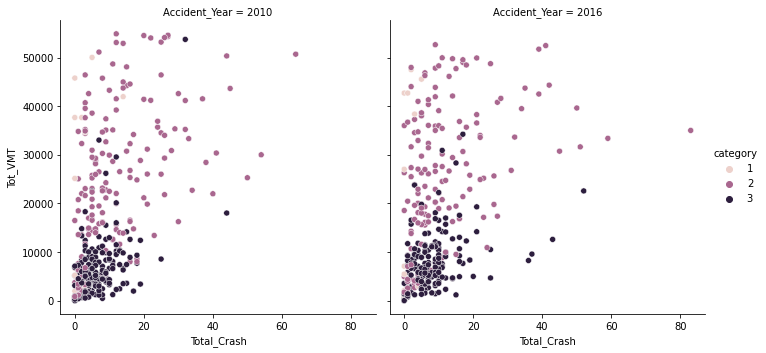

In [3]:
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==3)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_Tot_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

# I think both are similar observations
# Category 1 : is sporadic in nature
# Category 2 : is much sharper (I think its fits log or a second order)
# Category 3 : is very linear in nature

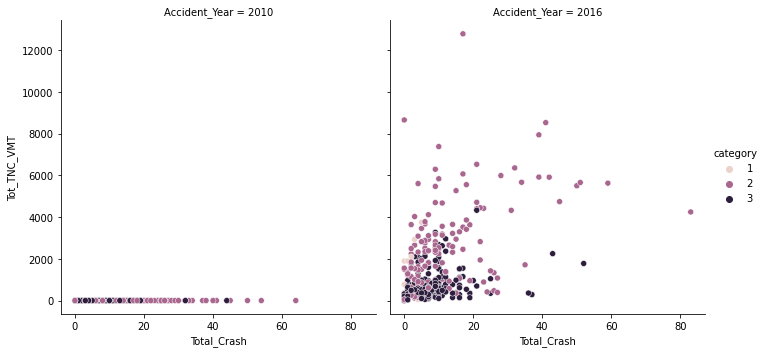

In [13]:
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="Tot_TNC_VMT", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : sporadic in nature
# Category 2 : sharper but not as much seen in Tot_VMT
# Category 3 : linear in nature

# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_Tot_TNC_VMT.png")
# # Saving the Seaborn Figure:
# plt.savefig(outfp,dpi=300)

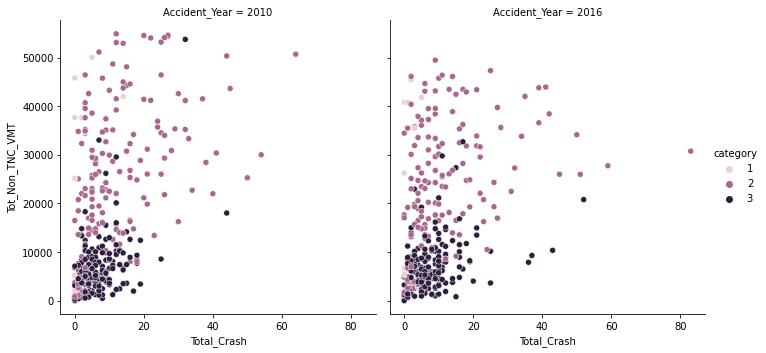

In [18]:
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="Tot_Non_TNC_VMT", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : sporadic in nature
# Category 2 : sharper (linear) but not as much seen in Tot_VMT
# Category 3 : linear in nature

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_Tot_Non_TNC_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

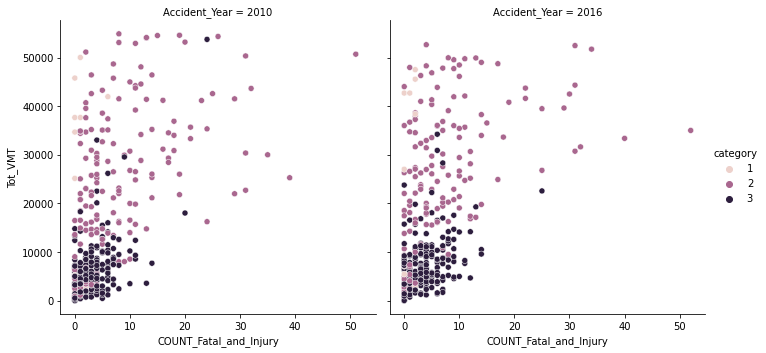

In [19]:
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="COUNT_Fatal_and_Injury", y="Tot_VMT", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : large number of zero's Fatal&Crashes, max being 5 or 6
# Category 2 : is much sharper (similar to tot_VMT)
# Category 3 : I dont think it is relational

outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Fatal_Injury_Crashes_vs_Tot_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

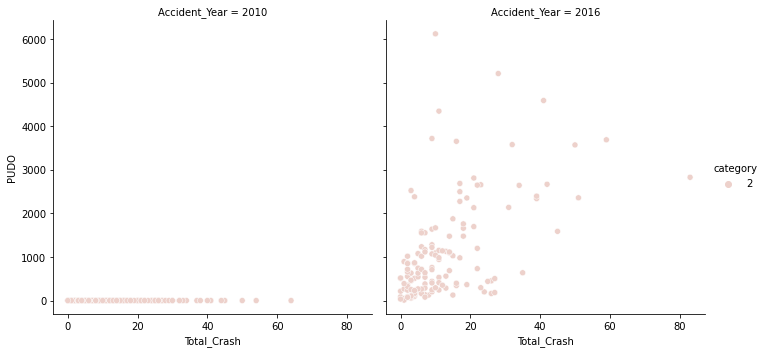

In [26]:
# exclude VMT>50K (main SF bridges)
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="PUDO", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : no relationship both for year 2010 and 2016
# Category 2 : positive and linear (though noisy)
# Category 3 : positive and linear

# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_PUDO.png")
# Saving the Seaborn Figure:
# plt.savefig(outfp,dpi=300)

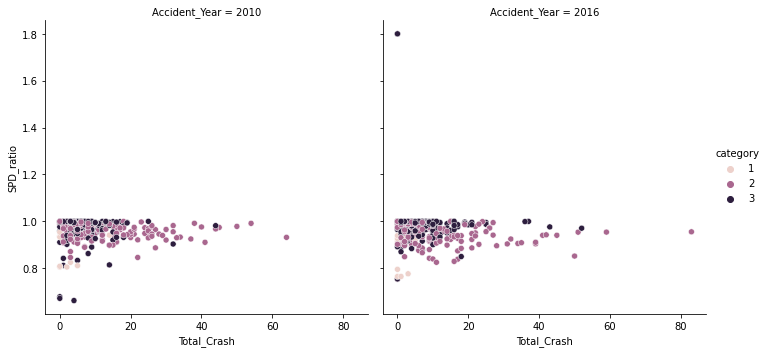

In [14]:
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="SPD_ratio", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : no relationship both for year 2010 and 2016
# Category 2 : negative and linear (more crashes, less speed ratio)
# Category 3 : negative and linear (more crashes, less speed ratio, mostly clustered around SPD_ratio>=0.80 and <1.0)
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_SPD_ratio.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

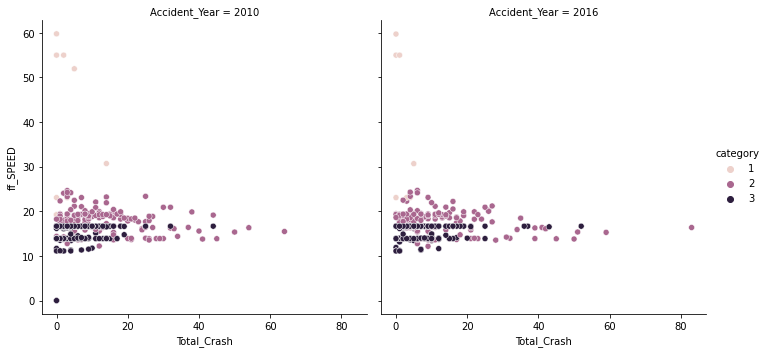

In [15]:
# Total Crash vs ff_SPEED?
# exclude VMT>50K (main SF bridges)
# dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000) & (dfmerged["category"]==2)] # can visualize graph by category types
dfSample = dfmerged.loc[(dfmerged["Tot_VMT"]<55000)]
# sns.relplot(x="Total_Crash", y="Tot_VMT", hue="category",style="Accident_Year", data=dfSample)
sns.relplot(x="Total_Crash", y="ff_SPEED", hue="category",col="Accident_Year", data=dfSample) # can separate plot Accident Years

# I think both are similar observations
# Category 1 : no relationship both for year 2010 and 2016
# Category 2 : negative and linear (more crashes, less speed ratio)
# Category 3 : negative and linear (more crashes, less speed ratio, mostly clustered around SPD_ratio>=0.80 and <1.0)
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"Total_Crashes_vs_ff_SPEED.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

In [33]:
# # Base dataframe
dfdiff = pd.read_csv(BASE_DIR.parent.joinpath(folder_path,"SF_yrcomparision_cat_CT.csv"))
# Count_Fat_Inj = ["COUNT_Fatal","COUNT_Visible_Injury","COUNT_Severe_Injury","COUNT_Other_Injury"]
# dfdiff["COUNT_Fatal_and_Injury"] = dfmerged[Count_Fat_Inj].sum(axis=1)
# dfmerged["SPD_ratio"] = dfmerged["CSPD_1"].divide(dfmerged["ff_SPEED"])
# # dfmerged.loc[dfmerged["Accident_Year"]==2010,"PUDO"]=0
# dfmerged["PUDO"].fillna(0,inplace=True)

In [34]:
dfdiff

,Unnamed: 0,tractce10_category,Accident_Year_2010,Accident_Year_2016,category_2010,category_2016,Bicycle_Collision_Count_2010,Bicycle_Collision_Count_2016,Bicycle_Collision_Count_diff,Bicycle_Collision_Count_pct_change,...,ff_SPEED_2010,ff_SPEED_2016,ff_SPEED_diff,ff_SPEED_pct_change,ff_TIME_2010,ff_TIME_2016,ff_TIME_diff,ff_TIME_pct_change,tractce10_2010,tractce10_2016
0,0,010100_2,2010,2016,2,2,10.0,13.0,3.0,30.000000,...,16.243776,16.381161,1.373848e-01,8.457686e-01,35.635623,38.693242,3.057619e+00,8.580233e+00,10100,10100
1,1,010100_3,2010,2016,3,3,1.0,1.0,0.0,0.000000,...,13.888889,13.888889,0.000000e+00,0.000000e+00,19.030190,25.472675,6.442484e+00,3.385402e+01,10100,10100
2,2,010200_2,2010,2016,2,2,3.0,3.0,0.0,0.000000,...,16.094259,16.087900,-6.359601e-03,-3.951472e-02,23.722342,24.893935,1.171593e+00,4.938775e+00,10200,10200
3,3,010200_3,2010,2016,3,3,0.0,1.0,1.0,0.000000,...,14.010422,14.108852,9.842977e-02,7.025468e-01,20.544564,29.062460,8.517895e+00,4.146058e+01,10200,10200
4,4,010300_2,2010,2016,2,2,0.0,2.0,2.0,0.000000,...,15.018857,14.979057,-3.980061e-02,-2.650043e-01,6.224878,6.224878,-8.881784e-16,-1.426821e-14,10300,10300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418,418,980600_2,2010,2016,2,2,0.0,0.0,0.0,0.000000,...,18.247720,18.620880,3.731600e-01,2.044967e+00,10.389993,11.527231,1.137238e+00,1.094551e+01,980600,980600
419,419,980600_3,2010,2016,3,3,0.0,0.0,0.0,0.000000,...,16.666667,16.666667,-3.552714e-15,-2.131628e-14,6.581625,23.379237,1.679761e+01,2.552198e+02,980600,980600
420,420,980900_1,2010,2016,1,1,0.0,0.0,0.0,0.000000,...,51.311983,51.404653,9.267039e-02,1.806018e-01,5.567171,5.567171,-8.881784e-16,-1.595386e-14,980900,980900
421,421,980900_2,2010,2016,2,2,6.0,2.0,-4.0,-66.666667,...,20.513500,20.461181,-5.231977e-02,-2.550504e-01,39.690501,39.690501,0.000000e+00,0.000000e+00,980900,980900


<AxesSubplot:xlabel='Total_Crash_2010', ylabel='Count'>

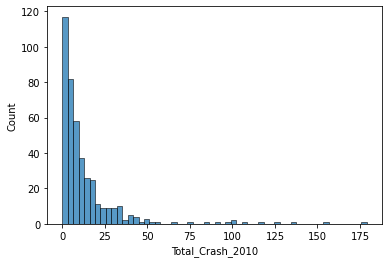

In [35]:
sns.histplot(data=dfdiff, x="Total_Crash_2010")

<AxesSubplot:xlabel='Total_Crash_2016', ylabel='Count'>

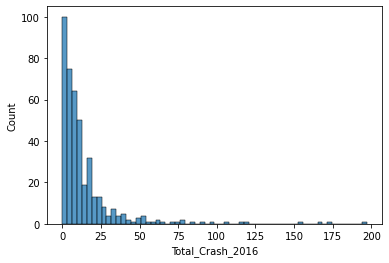

In [36]:
sns.histplot(data=dfdiff, x="Total_Crash_2016")

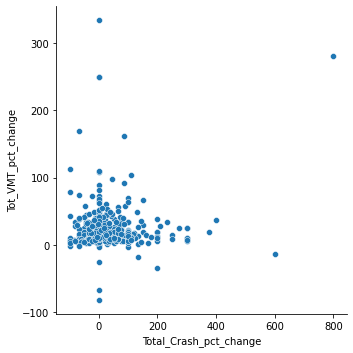

In [37]:
sns.relplot(x="Total_Crash_pct_change", y="Tot_VMT_pct_change", data=dfdiff) # can separate plot Accident Years
# Feedback
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"PCT_CHNGE_Total_Crashes_vs_Tot_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

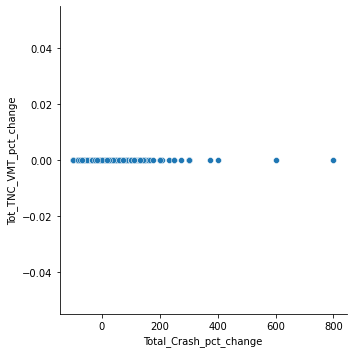

In [38]:
sns.relplot(x="Total_Crash_pct_change", y="Tot_TNC_VMT_pct_change", data=dfdiff) # can separate plot Accident Years
# Feedback
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"PCT_CHNGE_Total_Crashes_vs_Tot_TNC_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

# I think this should be absolute instead of pct_change given the FY2010 entry is zero

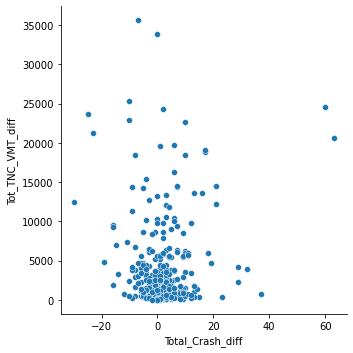

In [39]:
sns.relplot(x="Total_Crash_diff", y="Tot_TNC_VMT_diff", data=dfdiff) # can separate plot Accident Years
# Feedback
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"ABS_DIFF_Total_Crashes_vs_Tot_TNC_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)


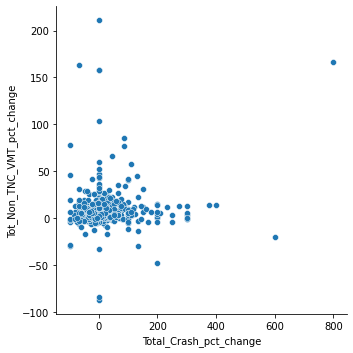

In [40]:
sns.relplot(x="Total_Crash_pct_change", y="Tot_Non_TNC_VMT_pct_change", data=dfdiff) # can separate plot Accident Years
# Feedback
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"PCT_CHNGE_Total_Crashes_vs_Tot_Non_TNC_VMT.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

# Very similar to Tot_VMT_pct change difference. The only reason why the pct_diff in VMT has a smaller jump than Tot_VMT is due to non-inclusion of Tot_TNC_VMT (FY2016) which kinds of jumps the overall pct in Tot_VMT

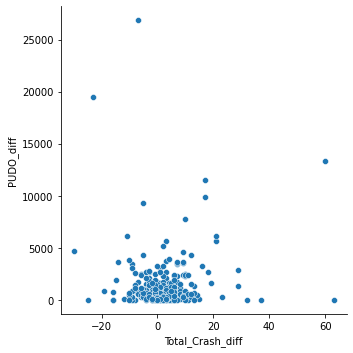

In [41]:
sns.relplot(x="Total_Crash_diff", y="PUDO_diff", data=dfdiff) # can separate plot Accident Years
# Feedback
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"ABS_DIFF_Total_Crashes_vs_PUDO.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

# Very similar to Tot_VMT_pct change difference. The only reason why the pct_diff in VMT has a smaller jump than Tot_VMT is due to non-inclusion of Tot_TNC_VMT (FY2016) which kinds of jumps the overall pct in Tot_VMT

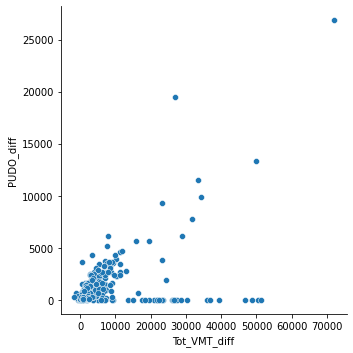

In [42]:
sns.relplot(x="Tot_VMT_diff", y="PUDO_diff", data=dfdiff) # can separate plot Accident Years
# Feedback
outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"ABS_DIFF_Tot_VMT_vs_PUDO.png")
# Saving the Seaborn Figure:
plt.savefig(outfp,dpi=300)

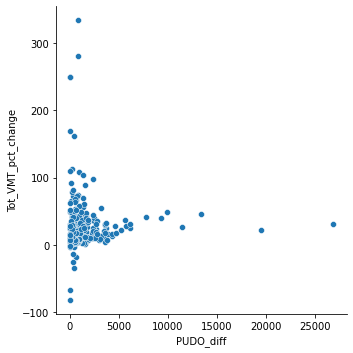

In [44]:
# What if we try Tot_VMT_pct_change?

sns.relplot(x="PUDO_diff", y="Tot_VMT_pct_change", data=dfdiff) # can separate plot Accident Years
# Feedback
# outfp = BASE_DIR.parent.joinpath(folder_path, "maps",f"ABS_DIFF_Tot_VMT_vs_PUDO.png")
# # Saving the Seaborn Figure:
# plt.savefig(outfp,dpi=300)